# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import numpy as np
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

# Modelling libraries
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [17]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

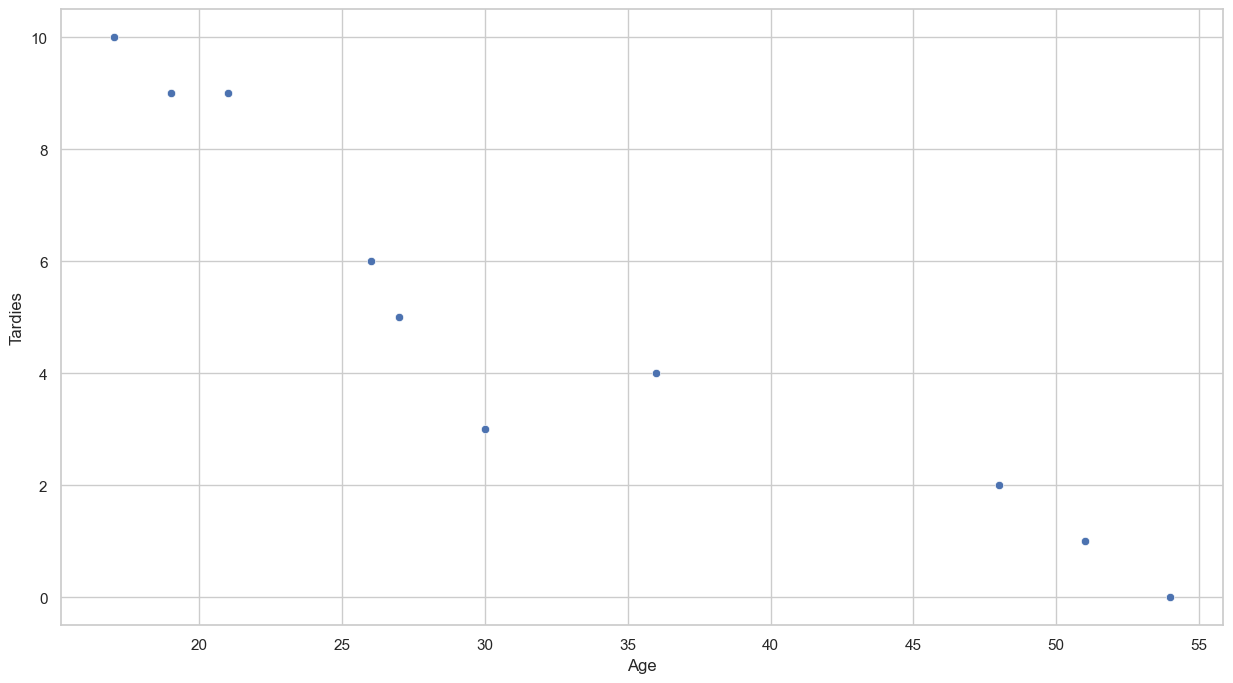

In [18]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"], data=student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [19]:
# The older the people the less prone to be late they are

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [20]:
student_data.cov(), student_data.corr()

(                Age    Tardies
 Age      187.655556 -45.566667
 Tardies  -45.566667  12.544444,
               Age   Tardies
 Age      1.000000 -0.939163
 Tardies -0.939163  1.000000)

In [ ]:
""" The strength and direction of the relationship between 'Age' and 'Tardies' are particularly noteworthy. 
The high magnitude of the correlation coefficient (-0.939163) points to a strong inverse linear relationship.
This suggests that in this dataset, older individuals tend to have fewer tardies, while younger individuals tend to have more. """

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [28]:
lr = LinearRegression()
X = student_data[["Age"]]
y = student_data["Tardies"]

lr.fit(X, y)
intercept = lr.intercept_  # 12.888803363135771
slope = lr.coef_[0]       # -0.2428207709159809

student_data["prediction_through_scikit_learn"] = student_data["Age"] * lr.coef_[0] + lr.intercept_

""" 
The type of regression used here is Linear Regression. 
Because it's being instantiated with LinearRegression() from scikit-learn
and the linear relationship between the predictor (Age) and the outcome variable (Tardies).
"""

" \nThe type of regression used here is Linear Regression. \nBecause it's being instantiated with LinearRegression() from scikit-learn\nand the linear relationship between the predictor (Age) and the outcome variable (Tardies).\n"

Plot your regression model on your scatter plot.

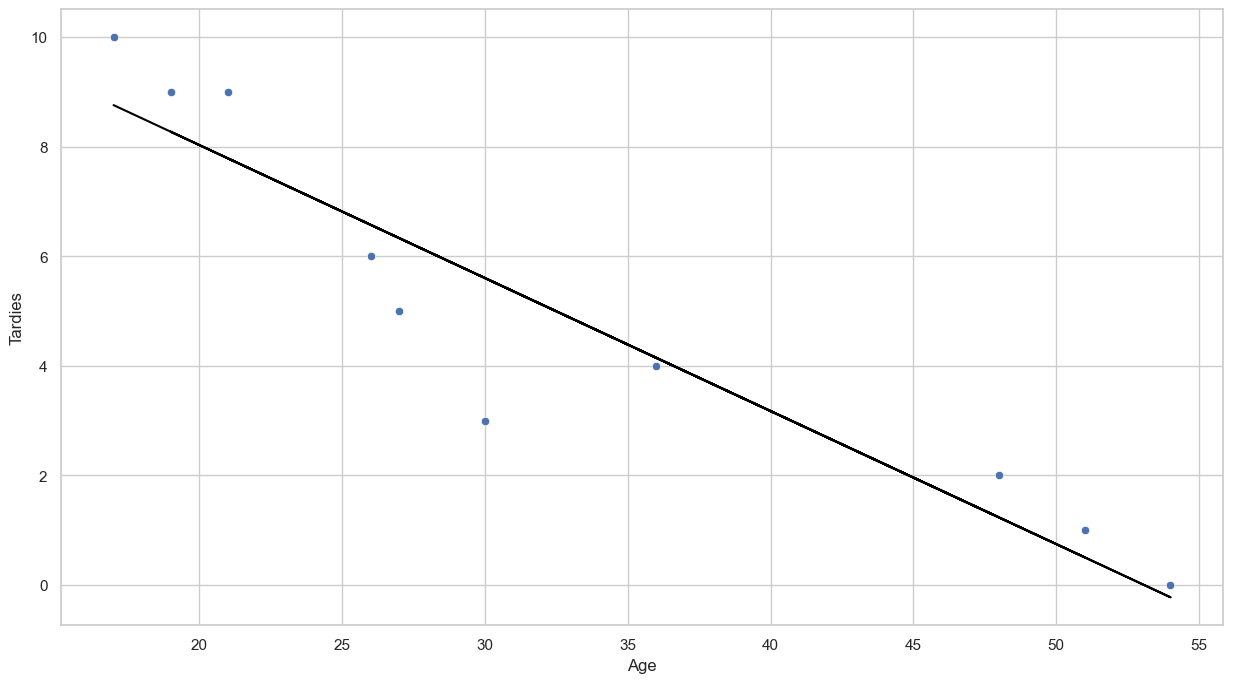

In [30]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"], data=student_data);
plt.plot(student_data["Age"], student_data["prediction_through_scikit_learn"], c="black", label="prediction_through_scikit_learn")


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [34]:
result = smf.ols("Tardies ~ Age", data = student_data).fit()
""" The model results indicate a strong negative relationship between age and tardiness,
with an R-squared value of 0.882, suggesting age explains a significant portion of the variation in tardiness. 
The statistical tests show that the relationship is highly significant. 
Therefore, we can be confident in concluding that age is a good predictor of tardiness. """
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        16:00:51   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [39]:
vehicles = pd.read_csv("./vehicles.csv")
vehicles.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
22667,Mazda,B2300 2WD,2001,2.3,4.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14.33087,21,26,23,386.391304,1450


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [46]:
subset = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
subset.cov()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,101.713065,1.459896,-9.960687,10.556963,-469.934524,-266.928999
Cylinders,1.459896,3.080967,5.798763,-6.269421,692.437947,157.237699
Fuel Barrels/Year,-9.960687,5.798763,19.956615,-20.777227,2074.962381,524.532182
Combined MPG,10.556963,-6.269421,-20.777227,26.136725,-2268.286203,-563.783910
Fuel Cost/Year,-469.934524,692.437947,2074.962381,-2268.286203,257007.049913,56185.983710
CO2 Emission Grams/Mile,-266.928999,157.237699,524.532182,-563.783910,56185.983710,14175.467724


In [47]:
subset.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
""" 
The variable with the strongest positive correlation to CO2 Emission Grams/Mile is Fuel Barrels/Year (0.986189).
This suggests it's the most important predictor for CO2 emissions among the variables listed.

The variable with the weakest correlation to CO2 Emission Grams/Mile is Year (0.222300).
This suggests it provides the least amount of helpful information for determining CO2 emissions compared to the other variables. 
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [67]:
X = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

lr = LinearRegression()

lr.fit(X, y)

lr.intercept_
lr.coef_

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

"""
The code constructs a multiple linear regression model using scikit-learn
and statsmodels to predict CO2 emissions based on variables like Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [69]:
model.summary()
""" 
Based on the OLS regression summary, the model is highly effective with an R-squared of 0.981,
indicating it explains 98.1% of the variance in CO2 emissions.
The most significant variables are 'Fuel Barrels/Year' and 'Combined MPG', given their high t-values and low p-values.
The large F-statistic and its associated low p-value confirm the model's overall significance.
However, the high skewness and kurtosis values suggest potential issues with the normality of residuals, which could affect the model's assumptions.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             17:16:55   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [75]:
parties = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attending': [1,2,4,4,5,7,8,13]})
parties["Absent"] = parties.apply(lambda x: x["Invited"] - x["Attending"], axis=1)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

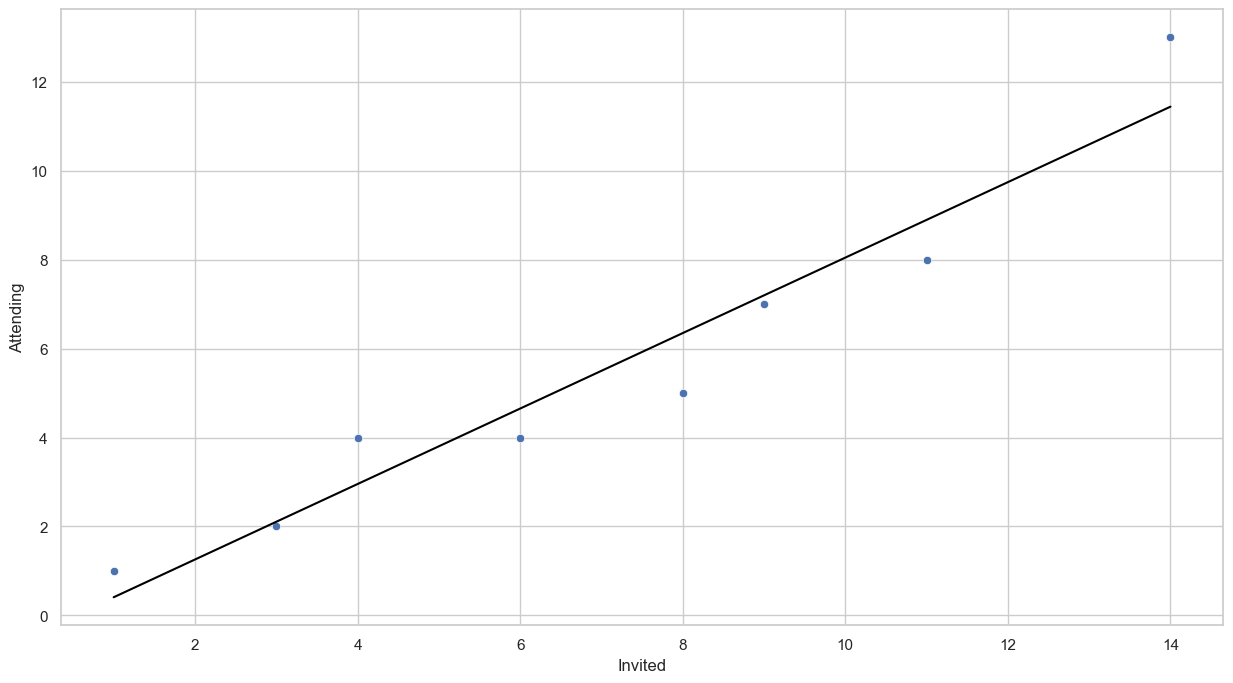

In [79]:
X = parties[["Invited"]]
y = parties["Attending"]

lr = LinearRegression()

lr.fit(X, y)

parties["prediction_through_scikit_learn"] = parties["Invited"] * lr.coef_[0] + lr.intercept_

sns.scatterplot(x=parties["Invited"], y=parties["Attending"], data=parties);
plt.plot(parties["Invited"], parties["prediction_through_scikit_learn"], c="black", label="prediction_through_scikit_learn")
plt.show();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [81]:
""" 
The model results indicate a strong positive relationship between people invited and the actual amount of people,
Therefore, we can be confident in concluding that the amount of people invited has a significant efect on the amount of people attending.
"""
result = smf.ols("Invited ~ Attending", data = parties).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Invited   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000102
Time:                        17:37:06   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
Attending      1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.

In [92]:
parties_clean = parties[(np.abs(stats.zscore(parties)) < 2).all(axis=1)]

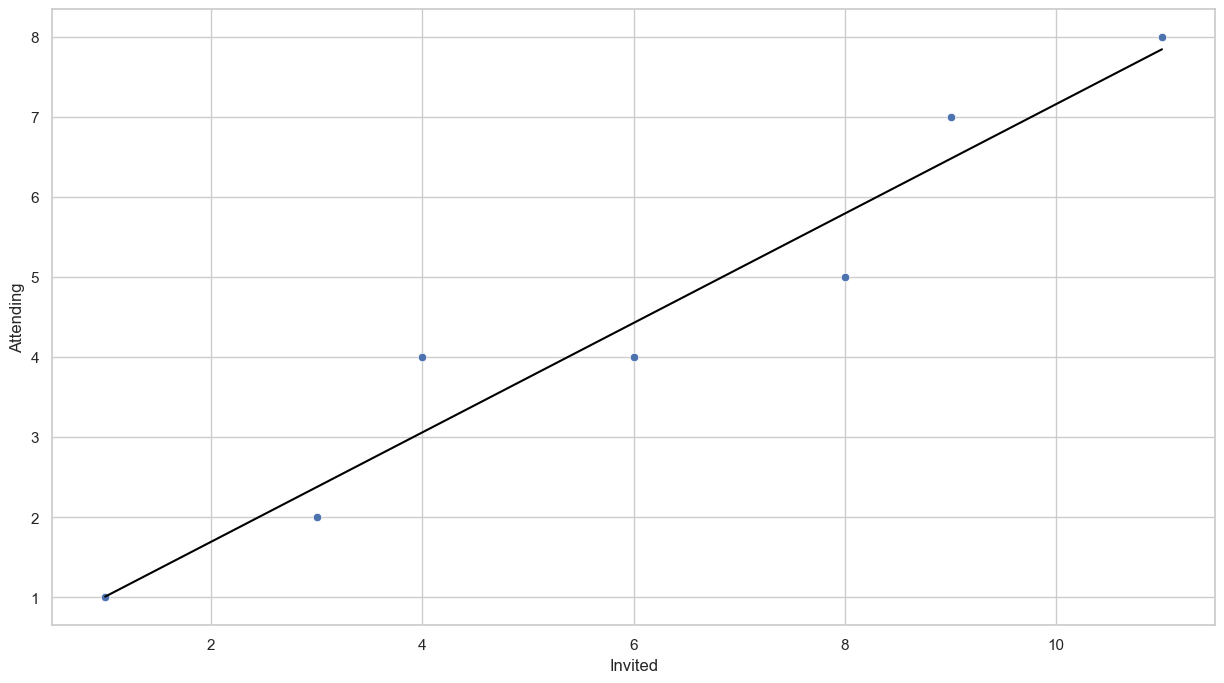

In [93]:
X = parties_clean[["Invited"]]
y = parties_clean["Attending"]

lr = LinearRegression()

lr.fit(X, y)

parties_clean["prediction_through_scikit_learn"] = parties_clean["Invited"] * lr.coef_[0] + lr.intercept_

sns.scatterplot(x=parties_clean["Invited"], y=parties_clean["Attending"], data=parties_clean);
plt.plot(parties_clean["Invited"], parties_clean["prediction_through_scikit_learn"], c="black", label="prediction_through_scikit_learn")
plt.show();

In [94]:
result = smf.ols("Invited ~ Attending", data = parties_clean).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Invited   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000264
Time:                        20:42:07   Log-Likelihood:                -8.2295
No. Observations:                   7   AIC:                             20.46
Df Residuals:                       5   BIC:                             20.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1061      0.755     -0.140      0.894      -2.048       1.835
Attending      1.3788      0.151      9.127      0.000       0.990       1.767
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.634
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.200
Skew:                          -0.282   Prob(JB):                        0.905
Kurtosis:                       2.394   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
""" 
After removing the outlier and recalculating the regression, the R-squared value improved slightly,
indicating a marginally better fit of the model to the data. 
The change in coefficients and standard errors suggests a more accurate representation
of the relationship between variables,
with the removal of the outlier likely reducing skewness and impact from extreme values.
This indicates that the initial model might have been influenced by the outlier,
affecting its overall predictive accuracy and the interpretation of variable importance. 
"""